In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from yellowbrick.classifier import ClassificationReport

In [2]:
df = pd.read_csv('/content/train.csv', parse_dates=['Dates'])
df = df.dropna()
df['date2'] = pd.to_datetime(df['Dates'])
df['Hour'] = df['date2'].dt.hour
df['Month'] = df['date2'].dt.month
df['Address'] = pd.factorize(df["Address"])[0]
df['PdDistrict'] = pd.factorize(df["PdDistrict"])[0]
df['DayOfWeek'] = pd.factorize(df["DayOfWeek"])[0]
df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,date2,Hour,Month
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,0,0,"ARREST, BOOKED",0,-122.425892,37.774599,2015-05-13 23:53:00,23,5
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,0,0,"ARREST, BOOKED",0,-122.425892,37.774599,2015-05-13 23:53:00,23,5
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,0,0,"ARREST, BOOKED",1,-122.424363,37.800414,2015-05-13 23:33:00,23,5
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,0,0,NONE,2,-122.426995,37.800873,2015-05-13 23:30:00,23,5
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,0,1,NONE,3,-122.438738,37.771541,2015-05-13 23:30:00,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,2,6,NONE,16120,-122.459033,37.714056,2003-01-06 00:15:00,0,1
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,2,NONE,13577,-122.447364,37.731948,2003-01-06 00:01:00,0,1
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,9,NONE,4417,-122.403390,37.780266,2003-01-06 00:01:00,0,1
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",2,9,NONE,2093,-122.390531,37.780607,2003-01-06 00:01:00,0,1


In [3]:
def correct_coordinates(district):
    tmp = df[df["PdDistrict"] == district]
    x_avg = tmp.X.mean()
    y_avg = tmp.Y.mean()
    return([x_avg,y_avg])

index_to_correct = df[(df["X"] > -121)|(df["Y"] > 50)].index

for i in index_to_correct:
    tmp = correct_coordinates(df.loc[i,"PdDistrict"])
    x = tmp[0]
    y = tmp[1]
    df.loc[i,"X"] = x 
    df.loc[i,"Y"] = y

In [4]:
df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,date2,Hour,Month
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,0,0,"ARREST, BOOKED",0,-122.425892,37.774599,2015-05-13 23:53:00,23,5
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,0,0,"ARREST, BOOKED",0,-122.425892,37.774599,2015-05-13 23:53:00,23,5
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,0,0,"ARREST, BOOKED",1,-122.424363,37.800414,2015-05-13 23:33:00,23,5
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,0,0,NONE,2,-122.426995,37.800873,2015-05-13 23:30:00,23,5
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,0,1,NONE,3,-122.438738,37.771541,2015-05-13 23:30:00,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,2,6,NONE,16120,-122.459033,37.714056,2003-01-06 00:15:00,0,1
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,2,NONE,13577,-122.447364,37.731948,2003-01-06 00:01:00,0,1
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,9,NONE,4417,-122.403390,37.780266,2003-01-06 00:01:00,0,1
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",2,9,NONE,2093,-122.390531,37.780607,2003-01-06 00:01:00,0,1


In [5]:
train, test = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

In [6]:
data_dict = {'WARRANTS': 1,
             'OTHER OFFENSES': 0,
             'LARCENY/THEFT': 1,
             'VEHICLE THEFT': 1,
             'VANDALISM': 1,
             'NON-CRIMINAL': 0,
             'ROBBERY': 1,
             'ASSAULT': 1,
             'WEAPON LAWS': 1,
             'BURGLARY': 1,
             'SUSPICIOUS OCC': 0,
             'DRUNKENNESS': 0,
             'FORGERY/COUNTERFEITING': 1,
             'DRUG/NARCOTIC': 1,
             'STOLEN PROPERTY': 1,
             'SECONDARY CODES': 0,
             'TRESPASS': 0,
             'MISSING PERSON': 1,
             'FRAUD': 1,
             'KIDNAPPING': 1,
             'RUNAWAY': 0,
             'DRIVING UNDER THE INFLUENCE': 0,
             'SEX OFFENSES FORCIBLE': 1,
             'PROSTITUTION': 0,
             'DISORDERLY CONDUCT': 0,
             'ARSON': 1,
             'FAMILY OFFENSES': 1,
             'LIQUOR LAWS': 0,
             'BRIBERY': 1,
             'EMBEZZLEMENT': 0,
             'SUICIDE': 1,
             'LOITERING': 0,
             'SEX OFFENSES NON FORCIBLE': 0,
             'EXTORTION': 1,
             'GAMBLING': 0,
             'BAD CHECKS': 0,
             'TREA': 0,
             'RECOVERED VEHICLE': 0,
             'PORNOGRAPHY/OBSCENE MAT': 0}

In [7]:
train["Category"] = train["Category"].replace(data_dict)
test["Category"] = test["Category"].replace(data_dict)

In [8]:
features = ["DayOfWeek", "X", "Y", "PdDistrict"]
X_train = train[features]
y_train = train["Category"]

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_test = test[features]
y_test = test["Category"]

knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)

# predictions = knn.predict(X_test)

# knn.score(X_train,y_train)   

In [9]:
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)


# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [10]:
print(grid_search.best_params_)

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 6}
Accuracy for our training dataset with tuning is : 59.00%


In [11]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

knn.score(X_train,y_train)

0.6607028232722995

In [12]:
ac_sc = accuracy_score(y_test, predictions)
rc_sc = recall_score(y_test, predictions, average="weighted")
pr_sc = precision_score(y_test, predictions, average="weighted")
f1_sc = f1_score(y_test, predictions, average='weighted')
confusion_m = confusion_matrix(y_test, predictions)

print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

Accuracy    :  0.5780536415921644
Recall      :  0.5780536415921644
Precision   :  0.5998815977722741
F1 Score    :  0.5862503763056842
Confusion Matrix: 
[[28185 30852]
 [43246 73327]]


In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.39      0.48      0.43     59037
           1       0.70      0.63      0.66    116573

    accuracy                           0.58    175610
   macro avg       0.55      0.55      0.55    175610
weighted avg       0.60      0.58      0.59    175610



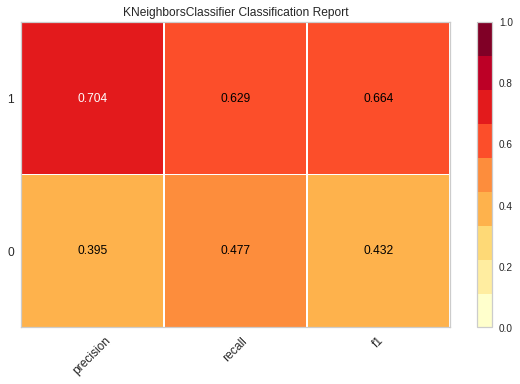

In [14]:
knn_visualizer = KNeighborsClassifier(n_neighbors=6)

visualizer = ClassificationReport(knn_visualizer)
visualizer.fit(X_train, y_train)     # Fit the training data to the visualizer
visualizer.score(X_test,y_test)       # Evaluate the model on the test data

visualizer.show()

In [15]:
features = ["DayOfWeek", "X", "Y", "PdDistrict", "Hour", "Month"] 
X_train = train[features]
y_train = train["Category"]

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_test = test[features]
y_test = test["Category"]

knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)

# predictions = knn.predict(X_test)

# knn.score(X_train,y_train)   

In [16]:
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)


# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [17]:
print(grid_search.best_params_)

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 64.95%


In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

knn.score(X_train,y_train)

0.9215640812611232

In [19]:
ac_sc = accuracy_score(y_test, predictions)
rc_sc = recall_score(y_test, predictions, average="weighted")
pr_sc = precision_score(y_test, predictions, average="weighted")
f1_sc = f1_score(y_test, predictions, average='weighted')
confusion_m = confusion_matrix(y_test, predictions)

print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

Accuracy    :  0.5797050281874608
Recall      :  0.5797050281874608
Precision   :  0.5934603212453593
F1 Score    :  0.5854928608989626
Confusion Matrix: 
[[26066 32971]
 [40837 75736]]


In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.39      0.44      0.41     59037
           1       0.70      0.65      0.67    116573

    accuracy                           0.58    175610
   macro avg       0.54      0.55      0.54    175610
weighted avg       0.59      0.58      0.59    175610



In [21]:
features = ["DayOfWeek", "X", "Y", "PdDistrict"]
X_train = train[features]
y_train = train["Category"]

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_test = test[features]
y_test = test["Category"]

rf=RandomForestClassifier()
# rf.fit(X_train,y_train)

# predictions=rf.predict(X_test)

# rf.score(X_train,y_train) 

In [22]:
n_estimators_range = [50, 100, 150]
param_grid = dict(n_estimators=n_estimators_range)


# defining parameter range
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [23]:
print(grid_search.best_params_)

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_estimators': 100}
Accuracy for our training dataset with tuning is : 63.74%


In [24]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

predictions=rf.predict(X_test)

rf.score(X_train,y_train)

0.7268718589458725

In [25]:
ac_sc = accuracy_score(y_test, predictions)
rc_sc = recall_score(y_test, predictions, average="weighted")
pr_sc = precision_score(y_test, predictions, average="weighted")
f1_sc = f1_score(y_test, predictions, average='weighted')
confusion_m = confusion_matrix(y_test, predictions)

print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

Accuracy    :  0.5941062581857525
Recall      :  0.5941062581857525
Precision   :  0.6181807211803393
F1 Score    :  0.6026088637088849
Confusion Matrix: 
[[30340 28697]
 [42582 73991]]


In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.42      0.51      0.46     59037
           1       0.72      0.63      0.67    116573

    accuracy                           0.59    175610
   macro avg       0.57      0.57      0.57    175610
weighted avg       0.62      0.59      0.60    175610



In [27]:
features = ["DayOfWeek", "X", "Y", "PdDistrict", "Hour", "Month"]
X_train = train[features]
y_train = train["Category"]

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_test = test[features]
y_test = test["Category"]

rf=RandomForestClassifier()
# rf.fit(X_train,y_train)

# predictions=rf.predict(X_test) 

# rf.score(X_train,y_train)     

In [28]:
n_estimators_range = [50, 100, 150]
param_grid = dict(n_estimators=n_estimators_range)


# defining parameter range
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [29]:
print(grid_search.best_params_)

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_estimators': 150}
Accuracy for our training dataset with tuning is : 67.51%


In [30]:
rf=RandomForestClassifier(n_estimators=150)
rf.fit(X_train,y_train)

predictions=rf.predict(X_test)

rf.score(X_train,y_train)

0.9329454044271555

In [31]:
ac_sc = accuracy_score(y_test, predictions)
rc_sc = recall_score(y_test, predictions, average="weighted")
pr_sc = precision_score(y_test, predictions, average="weighted")
f1_sc = f1_score(y_test, predictions, average='weighted')
confusion_m = confusion_matrix(y_test, predictions)

print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

Accuracy    :  0.6102329024543022
Recall      :  0.6102329024543022
Precision   :  0.6158663122612599
F1 Score    :  0.6128279598635341
Confusion Matrix: 
[[26531 32506]
 [35941 80632]]


In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.42      0.45      0.44     59037
           1       0.71      0.69      0.70    116573

    accuracy                           0.61    175610
   macro avg       0.57      0.57      0.57    175610
weighted avg       0.62      0.61      0.61    175610



In [33]:
# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)

# predictions = xgb.predict(X_test)

# xgb.score(X_train,y_train)

In [ ]:
# print(classification_report(y_test, predictions))